In [8]:
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import uuid
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


## Connecting Orders Report

In [9]:
# Connecting to database
import mysql.connector

conn = mysql.connector.connect(
    host = '34.136.54.93',
    user = 'root',
    password = 'root',
    database =  'abgrills'
)

cursor = conn.cursor()

# Querying the Data
query = '''
        SELECT * FROM orders_report
'''

cursor.execute(query)

rows = cursor.fetchall()


orders_report = []
for row in rows:
    orders_report.append(row)

conn.close()
cursor.close()


# Converting the data to a dataframe
import pandas as pd

columns = None

orders_report = pd.DataFrame(orders_report)
col_names = ['store_name','store_location','country_id','increment_id','status',
'state','delivery_method','product_name','base_currency_code','store_currency_code',
'price','base_price','custom_price','base_custom_price','qty','row_total','base_row_total','bas_cad','payment_method','created_at','updated_at','order_item_integrator_option']

orders_report.columns = col_names 

## Connecting Transaction Report

In [10]:
# Connecting to database
conn2 = mysql.connector.connect(
    host = '34.136.54.93',
    user = 'root',
    password = 'root',
    database =  'abgrills'
)

cursor2 = conn2.cursor()


# Querying the Data
query2 = '''
         SELECT * FROM transaction_report

'''

cursor2.execute(query2)

rows = cursor2.fetchall()

transaction_report = []
for row in rows:
    transaction_report.append(row)

conn2.close()
cursor2.close()


# Converting the data to a dataframe
transaction_report = pd.DataFrame(transaction_report)
col_names2 = ['id','store_name','store_location','country_id','customer_firstname',
'customer_lastname','customer_telephone','order_status','order_state',
'increment_id','delivery_method','subtotal','base_subtotal','store_delivery_charge',
'order_date','delivery_carrier','delivery_carrier_rate','source','clerk_id','delivery_address',
'payment_method','amount_ordered','amount_paid']
transaction_report.columns = col_names2

## Orders Report

In [11]:
# columns price and base_price are exactly the same. Dropped column base_price
orders_report[orders_report['price'] != orders_report['base_price']]
orders_report.drop('base_price',axis=1,inplace=True)

# columns row_total and base_row_total are exactly the same. Dropped column base_row_total
orders_report[orders_report['row_total'] != orders_report['base_row_total']]
orders_report.drop('base_row_total',axis=1,inplace=True)


# custom_price and base_custom_price only contain 0 values. Dropped columns
orders_report['custom_price'].value_counts()
orders_report['base_custom_price'].value_counts()
orders_report.drop(['custom_price','base_custom_price'],axis=1,inplace=True)

# dropped country_id and base_currency_code columns - No real information there
orders_report.drop(['country_id','base_currency_code'],axis=1,inplace=True)

# coverting created_at datatype to datetime 
orders_report['created_at'] = pd.to_datetime(orders_report['created_at'])
orders_report['created_at'] = orders_report['created_at'].dt.floor('T')

# coverting updated_at datatype to datetime 
orders_report['updated_at'] = pd.to_datetime(orders_report['updated_at'])
orders_report['updated_at'] = orders_report['updated_at'].dt.floor('T')


orders_report['order_year'] = orders_report['created_at'].dt.year
orders_report['order_month'] = orders_report['created_at'].dt.month
orders_report['order_month_name'] = orders_report['created_at'].dt.month_name()


# Renaming Columns
transaction_report.rename(columns={'increment_id':'orders_increment_id'})

C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\1284037478.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  orders_report['created_at'] = orders_report['created_at'].dt.floor('T')
C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\1284037478.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  orders_report['updated_at'] = orders_report['updated_at'].dt.floor('T')


,id,store_name,store_location,country_id,customer_firstname,customer_lastname,customer_telephone,order_status,order_state,orders_increment_id,...,store_delivery_charge,order_date,delivery_carrier,delivery_carrier_rate,source,clerk_id,delivery_address,payment_method,amount_ordered,amount_paid
0,16998024,AB GRILLS,None,NG,Fregene,Emmanuel,2.348064e+12,delivery_confirmed_by_vendor,complete,R26998024,...,0.0,2025-01-22 16:04:41,None,None,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",2695.0,2695.0
1,16997980,AB GRILLS,None,NG,maro,",,",2.349061e+12,delivery_confirmed_by_vendor,complete,R26997980,...,0.0,2025-01-22 16:03:00,None,None,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",3095.0,3095.0
2,16997724,AB GRILLS,None,NG,rita,.,2.348103e+12,delivery_confirmed_by_vendor,complete,R26997724,...,0.0,2025-01-22 15:53:19,None,None,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",6748.0,6748.0
3,16997357,AB GRILLS,None,NG,Alberta,.,2.349017e+12,delivery_confirmed_by_vendor,complete,R26997357,...,0.0,2025-01-22 15:38:16,None,None,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",6595.0,6595.0
4,16997265,AB GRILLS,None,NG,excellent,.....,2.347069e+12,delivery_confirmed_by_vendor,complete,R26997265,...,0.0,2025-01-22 15:36:04,None,None,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",849.0,849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18180,2505407,AB GRILLS,None,NG,Guest,Customer,NaN,delivery_confirmed_by_vendor,complete,R12505407,...,0.0,2023-03-16 01:33:05,None,None,skg_android,250860.0,"Benson Idahosa University Okah Campus,,NG","transfer,",4500.0,4500.0
18181,2505379,AB GRILLS,None,NG,Abraham,Emopkare,2.347038e+12,delivery_confirmed_by_vendor,complete,R12505379,...,0.0,2023-03-16 01:10:49,None,None,skg_android,252049.0,"Benson Idahosa University Okah Campus,,NG","cashoncollection_pos,",6000.0,6000.0
18182,2505341,AB GRILLS,None,NG,Guest,Customer,NaN,delivery_confirmed_by_vendor,complete,R12505341,...,0.0,2023-03-16 00:32:48,None,None,skg_android,250860.0,"Benson Idahosa University Okah Campus,,NG","cashoncollection_pos,",1500.0,1500.0
18183,1939166,AB GRILLS,None,NG,Abraham,Emopkare,2.347038e+12,delivery_confirmed_by_vendor,complete,R11939166,...,0.0,2023-01-22 16:24:27,None,None,skg_android,252049.0,"BIU, Lagacy Campus,,NG","posoncollection,",1500.0,1500.0


## Transaction Report

* transaction orders contains info about customers - their names, address, phone number

* orders contains info about the order itself - what was ordered, total amount paid

In [12]:
# Dropped empty columns
transaction_report.drop(['store_location','delivery_carrier','delivery_carrier_rate'],axis=1,inplace=True)

# columns subtotal and base_subtotal are exactly the same. Dropped column base_subtotal
transaction_report[transaction_report['subtotal'] != transaction_report['base_subtotal']]
transaction_report.drop('base_subtotal',axis=1,inplace=True)

# columns amount_ordered and amount_paid are exactly the same. Dropped column amount_ordered
transaction_report[transaction_report['amount_ordered'] != transaction_report['amount_paid']]
transaction_report.drop('amount_ordered',axis=1,inplace=True)

# columns subtotal and amount_paid are exactly the same. Dropped column subtotal
transaction_report[transaction_report['subtotal'] != transaction_report['amount_paid']]
transaction_report.drop('subtotal',axis=1,inplace=True)

# store_delivery_charge contains only 0 values. Dropped column
transaction_report['store_delivery_charge'].value_counts()
transaction_report.drop('store_delivery_charge',axis=1,inplace=True)

# store_name contains only AB GRILLS. Dropped column
transaction_report['store_name'].value_counts()
transaction_report.drop('store_name',axis=1,inplace=True)

# country_id only contains NG. Dropped column
transaction_report.drop('country_id',axis=1,inplace=True)

# Convert order_date to datetime
transaction_report['order_date'] = pd.to_datetime(transaction_report['order_date'])


# Added Date Time column
transaction_report['transaction_year'] = transaction_report['order_date'].dt.year
transaction_report['transaction_month'] = transaction_report['order_date'].dt.month
transaction_report['transaction_month_name'] = transaction_report['order_date'].dt.month_name()

# Change column name
transaction_report.rename(columns={'increment_id':'transaction_increment_id'})

# change contact number to string
# transaction_report['customer_telephone'] = transaction_report['customer_telephone'].astype('str')





,id,customer_firstname,customer_lastname,customer_telephone,order_status,order_state,transaction_increment_id,delivery_method,order_date,source,clerk_id,delivery_address,payment_method,amount_paid,transaction_year,transaction_month,transaction_month_name
0,16998024,Fregene,Emmanuel,2.348064e+12,delivery_confirmed_by_vendor,complete,R26998024,pickup,2025-01-22 16:04:41,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",2695.0,2025,1,January
1,16997980,maro,",,",2.349061e+12,delivery_confirmed_by_vendor,complete,R26997980,pickup,2025-01-22 16:03:00,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",3095.0,2025,1,January
2,16997724,rita,.,2.348103e+12,delivery_confirmed_by_vendor,complete,R26997724,pickup,2025-01-22 15:53:19,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",6748.0,2025,1,January
3,16997357,Alberta,.,2.349017e+12,delivery_confirmed_by_vendor,complete,R26997357,pickup,2025-01-22 15:38:16,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",6595.0,2025,1,January
4,16997265,excellent,.....,2.347069e+12,delivery_confirmed_by_vendor,complete,R26997265,pickup,2025-01-22 15:36:04,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",849.0,2025,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18180,2505407,Guest,Customer,NaN,delivery_confirmed_by_vendor,complete,R12505407,pickup,2023-03-16 01:33:05,skg_android,250860.0,"Benson Idahosa University Okah Campus,,NG","transfer,",4500.0,2023,3,March
18181,2505379,Abraham,Emopkare,2.347038e+12,delivery_confirmed_by_vendor,complete,R12505379,pickup,2023-03-16 01:10:49,skg_android,252049.0,"Benson Idahosa University Okah Campus,,NG","cashoncollection_pos,",6000.0,2023,3,March
18182,2505341,Guest,Customer,NaN,delivery_confirmed_by_vendor,complete,R12505341,pickup,2023-03-16 00:32:48,skg_android,250860.0,"Benson Idahosa University Okah Campus,,NG","cashoncollection_pos,",1500.0,2023,3,March
18183,1939166,Abraham,Emopkare,2.347038e+12,delivery_confirmed_by_vendor,complete,R11939166,pickup,2023-01-22 16:24:27,skg_android,252049.0,"BIU, Lagacy Campus,,NG","posoncollection,",1500.0,2023,1,January


In [13]:
len(transaction_report[(transaction_report['customer_telephone'].isna()) & (transaction_report['customer_firstname'].str.lower() != 'guest')])

22

In [14]:
# No unique identifier so added unique customer id column. This unique identifier is based on customer's phone numbers
# Here we assume every customer has a unique phone number.
# Also customer firstname shown as 'Guest' or 'guest' have been given a unique id

# Create a 1 UUID for all "Guest" entries
guest_id = uuid.uuid5(uuid.NAMESPACE_DNS,'guest_id')

def unique_id(row):
    # Check if 'Guest' with missing phone number
    if pd.isna(row['customer_telephone']) and row['customer_firstname'].strip().lower() == 'guest':
        return guest_id # Use the same guest_id for all such cases

    # Check if 'Guest' but has a phone number
    elif row['customer_firstname'].strip().lower() == 'guest':
        return guest_id # Use the same guest_id irrespective of phone number
    
    # Check if customer has a valid phone number
    elif pd.notna(row['customer_telephone']):
        return uuid.uuid5(uuid.NAMESPACE_DNS, str(row['customer_telephone']))

    # If no valid criteria are met
    else:
        return 'nan'
    
transaction_report['customer_id'] = transaction_report.apply(unique_id,axis=1)

In [15]:
## only 22 rows that dont have a phone number and isnt registered as a guest
len(transaction_report[(transaction_report['customer_telephone'].isna())  & (transaction_report['customer_firstname'].str.lower() !='guest')])

22

In [16]:
transaction_report[transaction_report['customer_firstname']=='Guest'].sample(4)

,id,customer_firstname,customer_lastname,customer_telephone,order_status,order_state,increment_id,delivery_method,order_date,source,clerk_id,delivery_address,payment_method,amount_paid,transaction_year,transaction_month,transaction_month_name,customer_id
17213,2929512,Guest,Customer,NaN,delivery_confirmed_by_vendor,complete,R12929512,pickup,2023-04-25 19:48:24,skg_android,250860.0,"Benson Idahosa University Legacy Campus,,NG","transfer,",4548.0,2023,4,April,74a0461f-f8af-5d9f-b5e1-1e1a784e2a54
13231,7090387,Guest,Customer,NaN,delivery_confirmed_by_vendor,complete,R17090387,pickup,2023-12-12 19:46:26,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","posoncollection,",100.0,2023,12,December,74a0461f-f8af-5d9f-b5e1-1e1a784e2a54
10051,9409923,Guest,Customer,NaN,delivery_confirmed_by_vendor,complete,R19409923,pickup,2024-03-20 21:47:32,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",2649.0,2024,3,March,74a0461f-f8af-5d9f-b5e1-1e1a784e2a54
10870,8591470,Guest,Customer,NaN,delivery_confirmed_by_vendor,complete,R18591470,dinein,2024-02-15 13:10:40,skg_android,267702.0,"Benson Idahosa University Legacy Campus,,NG","prepaid_pos,",3149.0,2024,2,February,74a0461f-f8af-5d9f-b5e1-1e1a784e2a54


### A. Sales Analysis for Transaction Orders

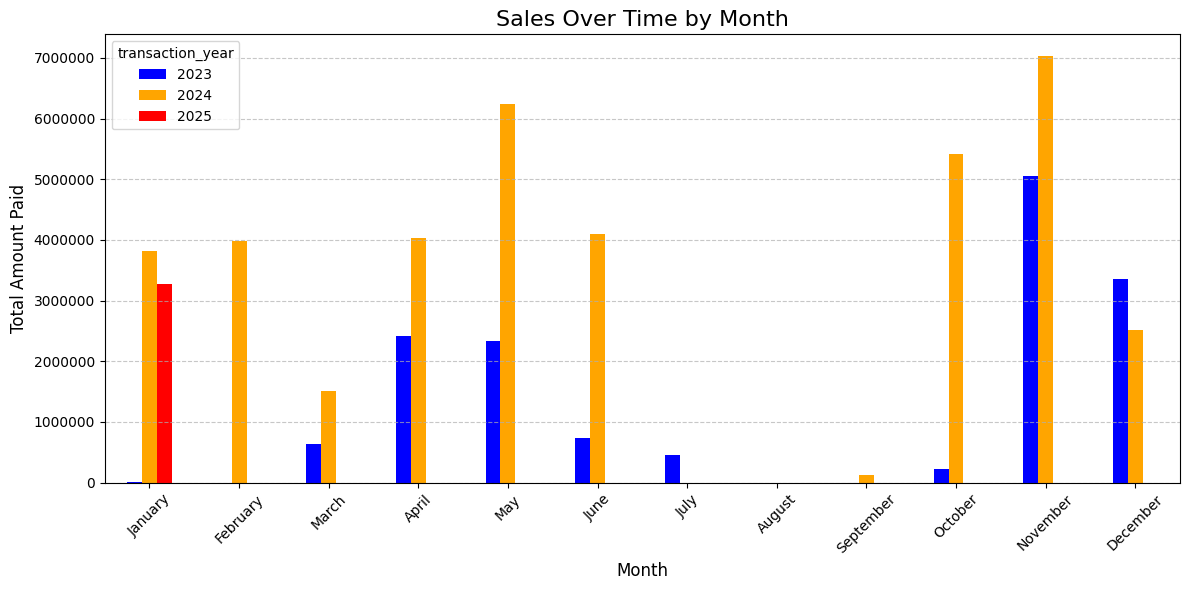

In [17]:
MoM_sales = transaction_report.groupby(['transaction_year','transaction_month_name'])['amount_paid'].sum()

month_order= ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

# Reindex the DataFrame to ensure months are in proper order
MoM_sales = MoM_sales.unstack(level=0)
MoM_sales = MoM_sales.reindex(labels=month_order)


MoM_sales.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange','red'])

plt.ticklabel_format(style='plain',axis='y')

# Add labels and title for clarity
plt.title('Sales Over Time by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Amount Paid', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

* Over the years, ABGrills have seen consistent growth
* 2024 was more generated more revenue in each month except December than 2023

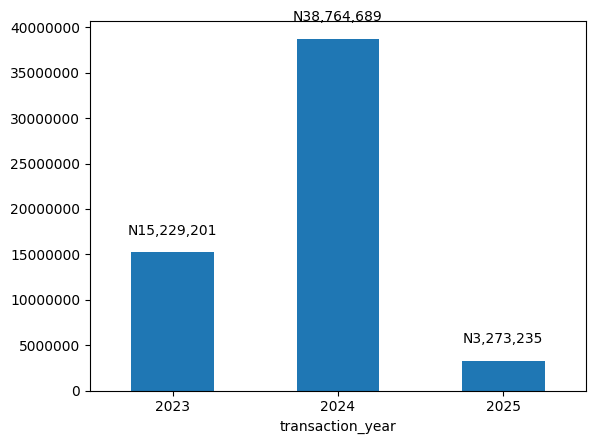

In [18]:
YoY_sales = transaction_report.groupby('transaction_year')['amount_paid'].sum()
YoY_sales.plot(kind='bar')

for i, value in enumerate(YoY_sales):
    plt.text(i,value + 0.05*max(YoY_sales),f'N{value:,.0f}', ha='center', fontsize=10)

plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')

plt.show()


### B1. Churn Analysis for Transaction Orders

#### i. recency

In [19]:
import datetime

rfm = pd.DataFrame(transaction_report.groupby('customer_id')['order_date'].max().reset_index())#.rename('recency'))

# the date was 25th Jan 2025
today = pd.to_datetime(datetime.datetime.today())

# new column recency (days) showing days since last purchase
rfm['recency (days)'] = today - rfm['order_date']
rfm['recency (days)'] = rfm['recency (days)'].dt.days
rfm['rfm_year'] = rfm['order_date'].dt.year


In [20]:
rfm

,customer_id,order_date,recency (days),rfm_year
0,00127fba-3dc7-5b66-a30a-26c9b5f84141,2023-04-24 18:45:30,657,2023
1,002f614c-8b51-588b-b4ce-dc179a549dbb,2024-10-04 18:19:12,128,2024
2,00a96437-e53b-5ffc-a329-79d699bd8a83,2023-05-08 21:10:04,643,2023
3,00ce8836-7bb9-50c8-9acd-9077c461d9d6,2025-01-07 20:50:57,33,2025
4,00d8571a-ae6d-5bec-bbdb-b6f0d140d492,2024-11-12 11:34:22,90,2024
...,...,...,...,...
2528,ffd97165-e30f-5076-bf21-d2e2a5a93253,2025-01-18 10:30:27,23,2025
2529,ffdd7e55-460b-582e-8da8-d517461f5f20,2025-01-13 15:06:21,27,2025
2530,fff562b2-b888-5168-9378-3994c265f574,2024-12-11 20:39:08,60,2024
2531,ffff3407-324c-5bad-8ab7-14d5d7aa96ed,2024-05-28 21:22:37,257,2024


C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\3328814098.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency_bins = rfm.groupby('recency_bin')['recency_bin'].count()


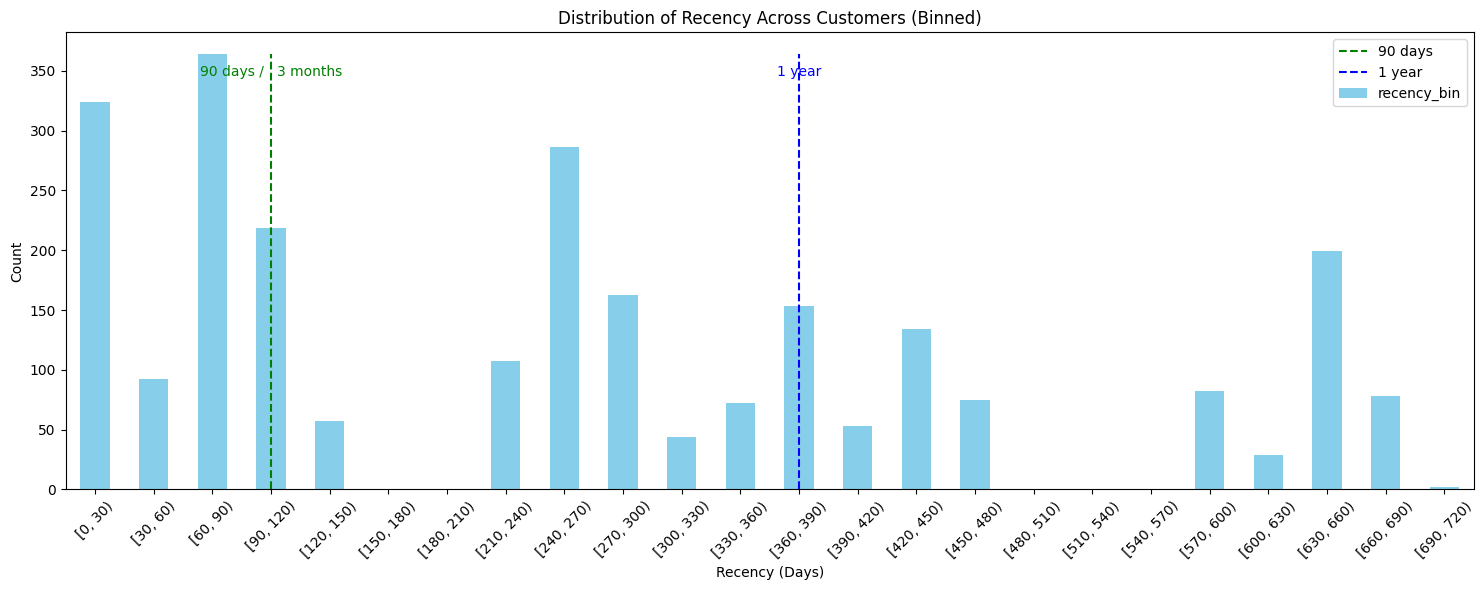

In [21]:
# Group recency into bins of 30 days
rfm['recency_bin'] = pd.cut(rfm['recency (days)'],bins=range(0,750,30),right=False)

# Aggregate the data
recency_bins = rfm.groupby('recency_bin')['recency_bin'].count()

# Plot the grouped data
recency_bins.plot(kind='bar', figsize=(15, 6), color='skyblue')

# Add vertical line for 3 months
plt.vlines(x=3, ymin=0, ymax=recency_bins.max(), colors='green', linestyle='--', label='90 days')
plt.text(3, recency_bins.max() * 0.95, '90 days /   3 months', color='green', fontsize=10, ha='center')

# Add vertical line for 1 year
plt.vlines(x=12, ymin=0, ymax=recency_bins.max(), colors='blue', linestyle='--', label='1 year')
plt.text(12, recency_bins.max() * 0.95, '1 year', color='blue', fontsize=10, ha='center')

           
# Set labels and titles
plt.title('Distribution of Recency Across Customers (Binned)')
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
rfm

,customer_id,order_date,recency (days),rfm_year,recency_bin
0,00127fba-3dc7-5b66-a30a-26c9b5f84141,2023-04-24 18:45:30,657,2023,"[630, 660)"
1,002f614c-8b51-588b-b4ce-dc179a549dbb,2024-10-04 18:19:12,128,2024,"[120, 150)"
2,00a96437-e53b-5ffc-a329-79d699bd8a83,2023-05-08 21:10:04,643,2023,"[630, 660)"
3,00ce8836-7bb9-50c8-9acd-9077c461d9d6,2025-01-07 20:50:57,33,2025,"[30, 60)"
4,00d8571a-ae6d-5bec-bbdb-b6f0d140d492,2024-11-12 11:34:22,90,2024,"[90, 120)"
...,...,...,...,...,...
2528,ffd97165-e30f-5076-bf21-d2e2a5a93253,2025-01-18 10:30:27,23,2025,"[0, 30)"
2529,ffdd7e55-460b-582e-8da8-d517461f5f20,2025-01-13 15:06:21,27,2025,"[0, 30)"
2530,fff562b2-b888-5168-9378-3994c265f574,2024-12-11 20:39:08,60,2024,"[60, 90)"
2531,ffff3407-324c-5bad-8ab7-14d5d7aa96ed,2024-05-28 21:22:37,257,2024,"[240, 270)"


#### i1. Recency per year 2023

C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\299524111.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency2023 = recency2023.groupby('recency_bin')['recency_bin'].count()


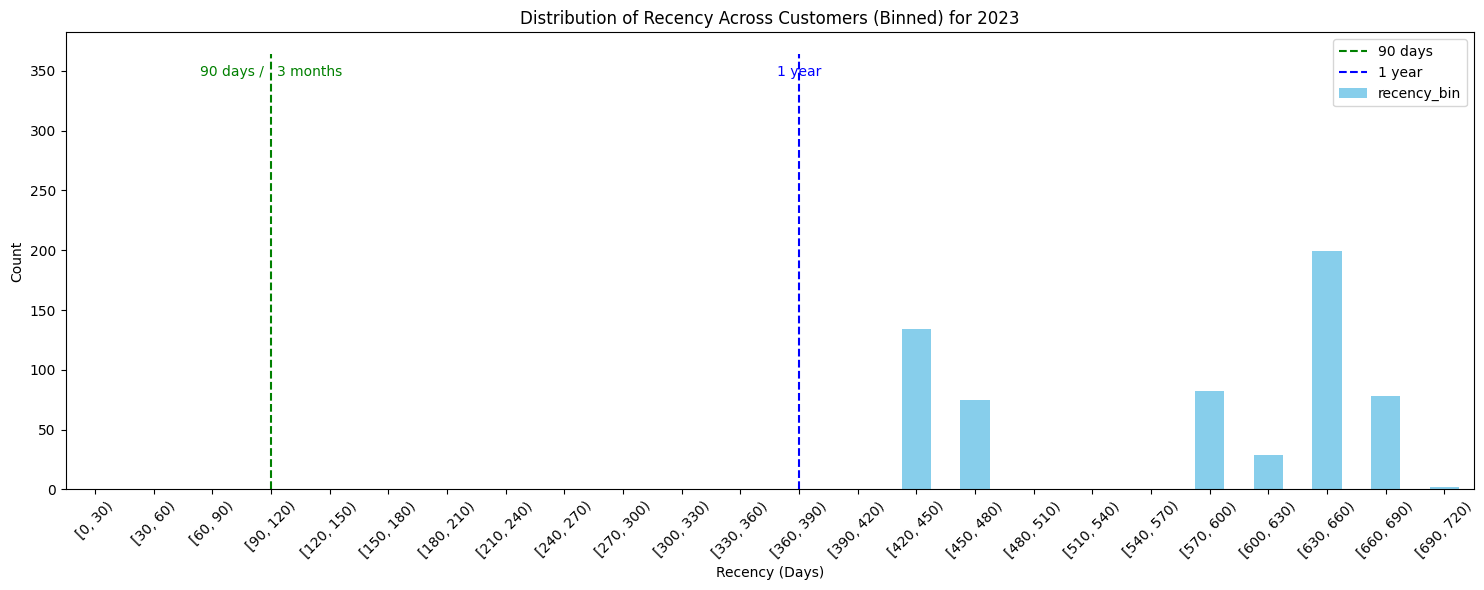

In [23]:
recency2023 = rfm[rfm['rfm_year']==2023]
recency2023 = recency2023.groupby('recency_bin')['recency_bin'].count()

# Plot the grouped data
recency2023.plot(kind='bar', figsize=(15, 6), color='skyblue')

# Add vertical line for 3 months
plt.vlines(x=3, ymin=0, ymax=recency_bins.max(), colors='green', linestyle='--', label='90 days')
plt.text(3, recency_bins.max() * 0.95, '90 days /   3 months', color='green', fontsize=10, ha='center')

# Add vertical line for 1 year
plt.vlines(x=12, ymin=0, ymax=recency_bins.max(), colors='blue', linestyle='--', label='1 year')
plt.text(12, recency_bins.max() * 0.95, '1 year', color='blue', fontsize=10, ha='center')

           
# Set labels and titles
plt.title('Distribution of Recency Across Customers (Binned) for 2023')
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### i2. Recency per year 2024

C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\3418549519.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency2024 = recency2024.groupby('recency_bin')['recency_bin'].count()


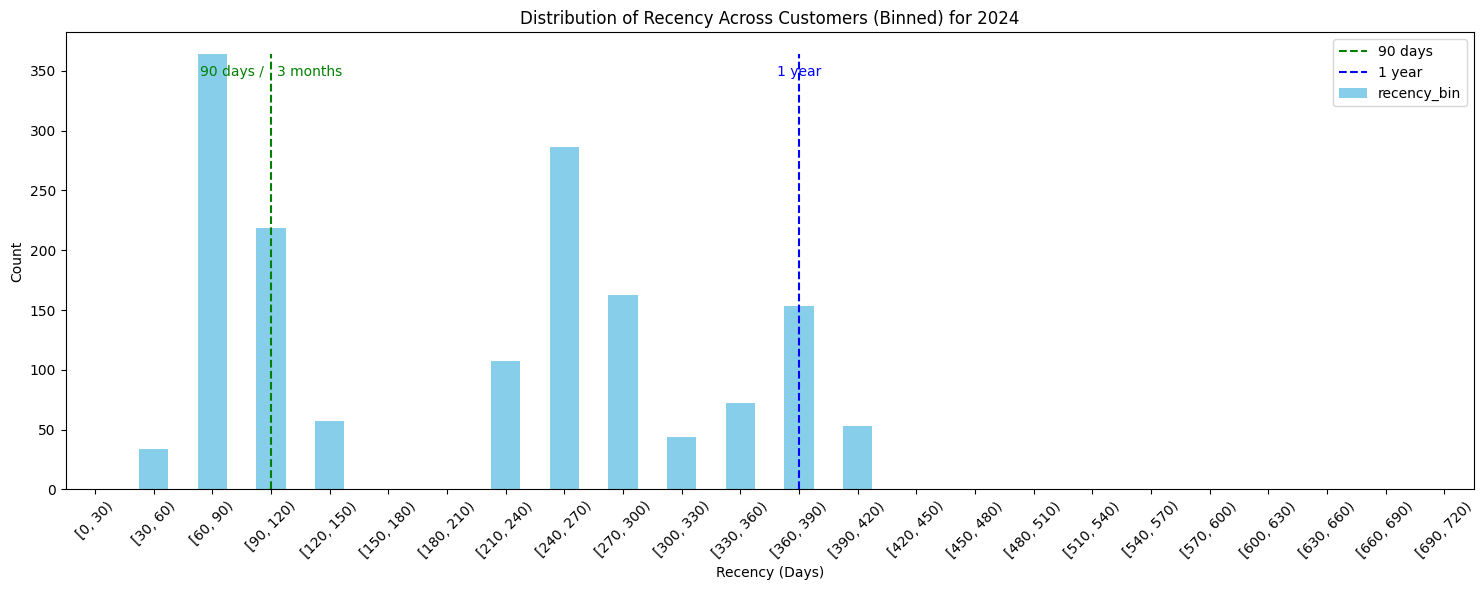

In [24]:
recency2024 = rfm[rfm['rfm_year']==2024]
recency2024 = recency2024.groupby('recency_bin')['recency_bin'].count()

# Plot the grouped data
recency2024.plot(kind='bar', figsize=(15, 6), color='skyblue')

# Add vertical line for 3 months
plt.vlines(x=3, ymin=0, ymax=recency_bins.max(), colors='green', linestyle='--', label='90 days')
plt.text(3, recency_bins.max() * 0.95, '90 days /   3 months', color='green', fontsize=10, ha='center')

# Add vertical line for 1 year
plt.vlines(x=12, ymin=0, ymax=recency_bins.max(), colors='blue', linestyle='--', label='1 year')
plt.text(12, recency_bins.max() * 0.95, '1 year', color='blue', fontsize=10, ha='center')

           
# Set labels and titles
plt.title('Distribution of Recency Across Customers (Binned) for 2024')
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### i3. Recency per year 2025

C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\1166288636.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency2025 = recency2025.groupby('recency_bin')['recency_bin'].count()


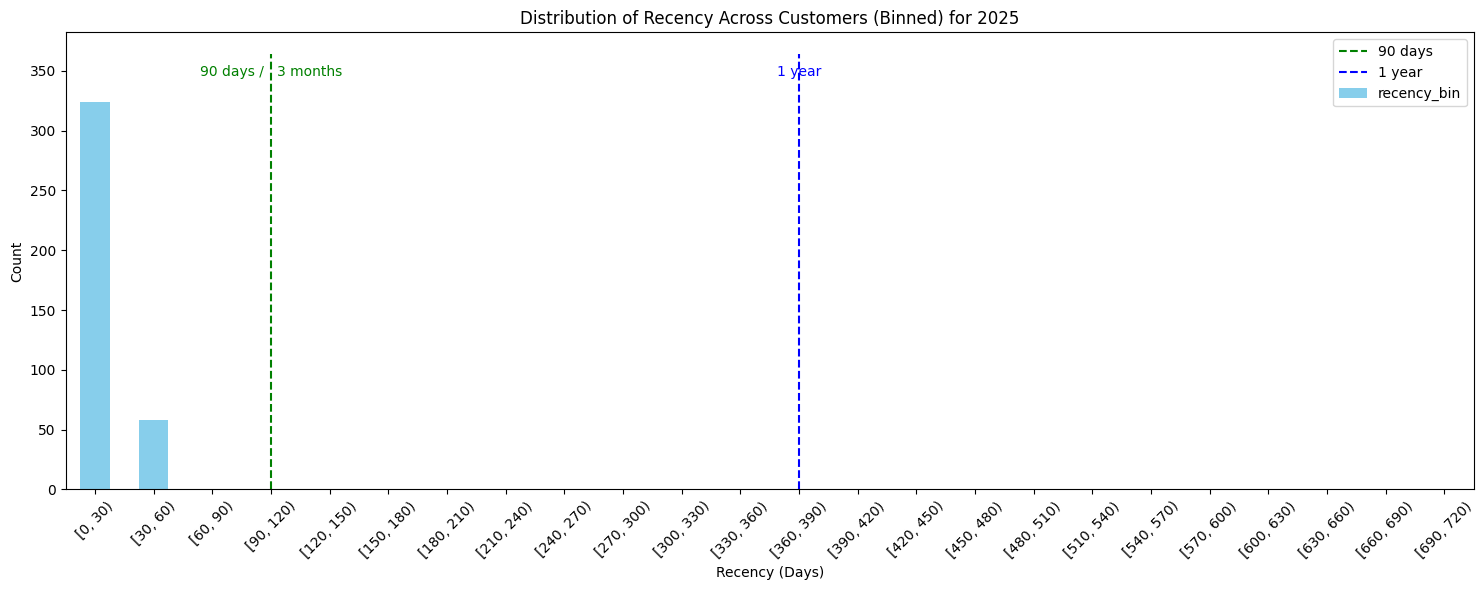

In [25]:
recency2025 = rfm[rfm['rfm_year']==2025]
recency2025 = recency2025.groupby('recency_bin')['recency_bin'].count()

# Plot the grouped data
recency2025.plot(kind='bar', figsize=(15, 6), color='skyblue')

# Add vertical line for 3 months
plt.vlines(x=3, ymin=0, ymax=recency_bins.max(), colors='green', linestyle='--', label='90 days')
plt.text(3, recency_bins.max() * 0.95, '90 days /   3 months', color='green', fontsize=10, ha='center')

# Add vertical line for 1 year
plt.vlines(x=12, ymin=0, ymax=recency_bins.max(), colors='blue', linestyle='--', label='1 year')
plt.text(12, recency_bins.max() * 0.95, '1 year', color='blue', fontsize=10, ha='center')

           
# Set labels and titles
plt.title('Distribution of Recency Across Customers (Binned) for 2025')
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### ii. frequency

In [26]:
freq = pd.DataFrame(transaction_report.groupby('customer_id')['order_date'].count().reset_index().rename(columns={'order_date':'frequency'}))


In [27]:
freq['frequency'].max()

np.int64(663)

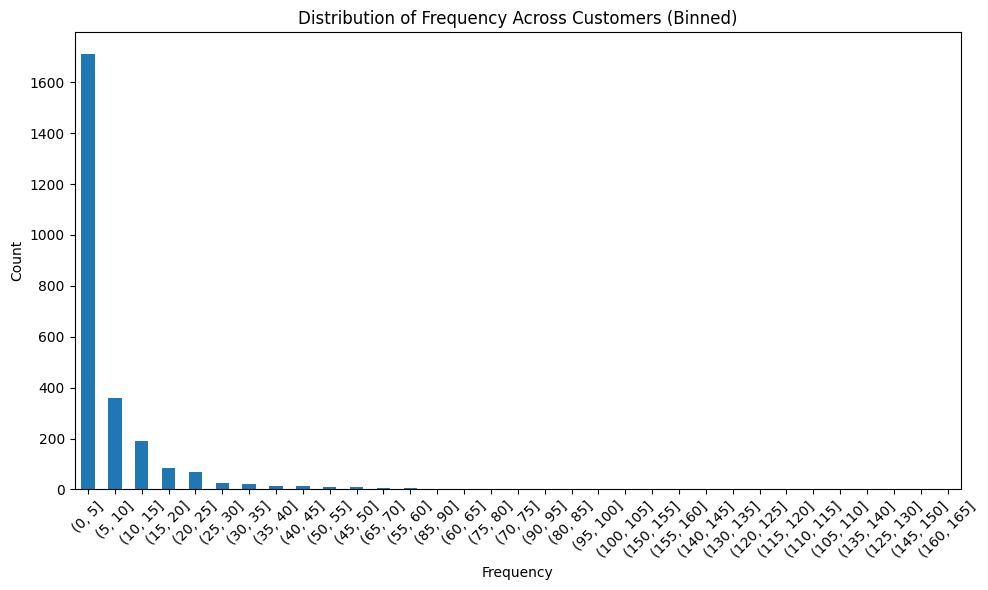

In [28]:
rfm = pd.merge(rfm,freq,on='customer_id',how='inner')

# Group recency into bins of 30 days
rfm['frequency_bin'] = pd.cut(rfm['frequency'],bins=range(0,170,5))


rfm['frequency_bin'].value_counts().plot(kind='bar',figsize=(10,6))
# Set labels and titles
plt.title('Distribution of Frequency Across Customers (Binned)')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
rfm[rfm['customer_id']=='nan']

,customer_id,order_date,recency (days),rfm_year,recency_bin,frequency,frequency_bin
2532,nan,2025-01-21 17:07:26,19,2025,"[0, 30)",22,"(20, 25]"


#### iii. Monetary

In [30]:
monetary = transaction_report.groupby('customer_id')['amount_paid'].sum().reset_index().rename(columns={'amount_paid':'total_amount'})
rfm = pd.merge(rfm,monetary,on='customer_id',how='left')

#### iv. Creating a score for each element of RFM

In [31]:
rfm.loc[:,'recency_score'] = pd.qcut(rfm['recency (days)'],5,labels=[5,4,3,2,1])
rfm.loc[:,'frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm.loc[:,'monetary_score'] = pd.qcut(rfm['total_amount'],5,labels=[1,2,3,4,5])

rfm['rfm_score'] = round(((rfm['recency_score'].astype(int) + rfm['frequency_score'].astype(int) + rfm['monetary_score'].astype(int))/3),1)

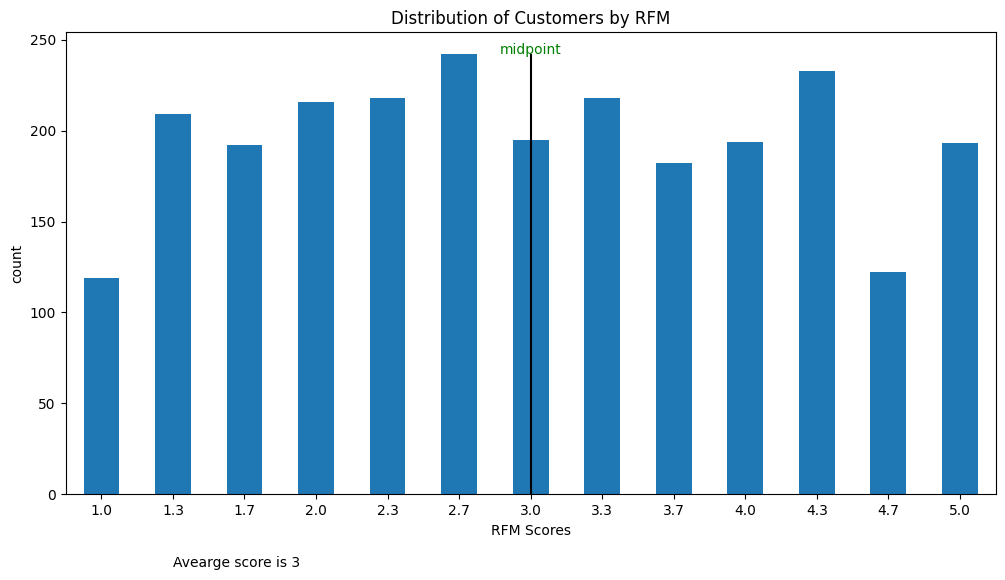

In [32]:
rfm['rfm_score'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.vlines(x=6,ymin=0,ymax=rfm['rfm_score'].value_counts().max(),linestyles='-',colors='black')
plt.text(x=6, y=rfm['rfm_score'].value_counts().max(),s='midpoint', color='green', ha='center')

mean_score = rfm['rfm_score'].mean()

plt.title('Distribution of Customers by RFM')
plt.ylabel('count')
plt.xlabel('RFM Scores')
plt.xticks(rotation=0)

plt.text(1,-40, f'Avearge score is {mean_score:.0f}')
plt.show()

#### iv.a) RFM score distribution for 2023

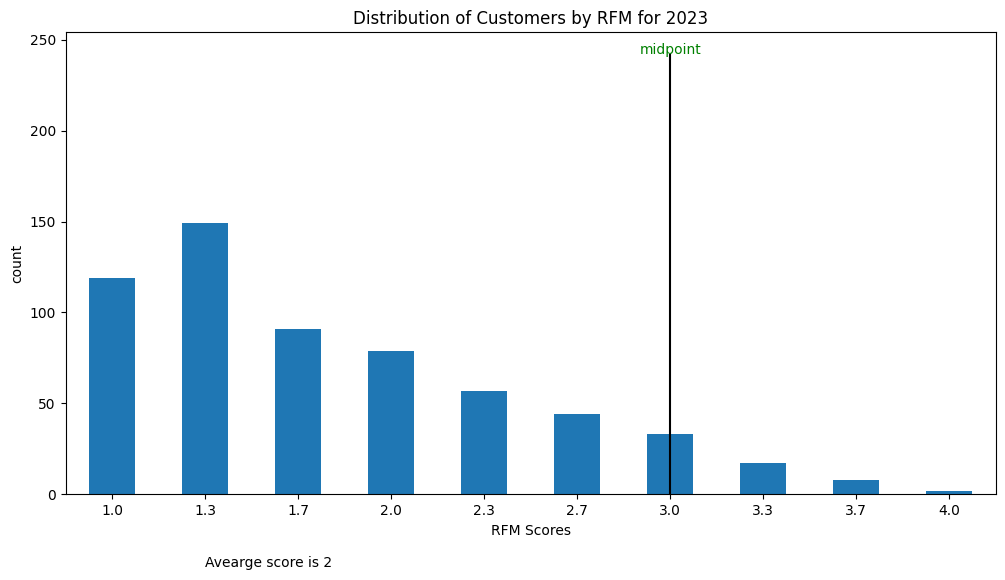

In [33]:
rfm2023 = rfm[rfm['rfm_year']==2023]

rfm2023['rfm_score'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.vlines(x=6,ymin=0,ymax=rfm['rfm_score'].value_counts().max(),linestyles='-',colors='black')
plt.text(x=6, y=rfm['rfm_score'].value_counts().max(),s='midpoint', color='green', ha='center')

mean_score = rfm2023['rfm_score'].mean()

plt.title('Distribution of Customers by RFM for 2023')
plt.ylabel('count')
plt.xlabel('RFM Scores')
plt.xticks(rotation=0)

plt.text(1,-40, f'Avearge score is {mean_score:.0f}')
plt.show()

#### iv.b) RFM score distribution for 2024

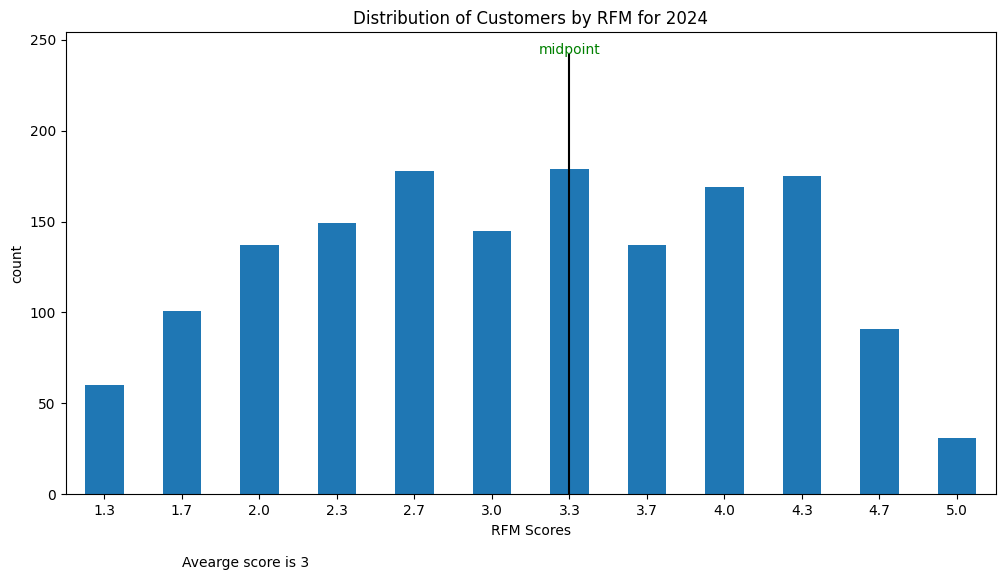

In [34]:
rfm_score2024 = rfm[rfm['rfm_year']==2024]

rfm_score2024['rfm_score'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.vlines(x=6,ymin=0,ymax=rfm['rfm_score'].value_counts().max(),linestyles='-',colors='black')
plt.text(x=6, y=rfm['rfm_score'].value_counts().max(),s='midpoint', color='green', ha='center')

mean_score = rfm_score2024['rfm_score'].mean()

plt.title('Distribution of Customers by RFM for 2024')
plt.ylabel('count')
plt.xlabel('RFM Scores')
plt.xticks(rotation=0)

plt.text(1,-40, f'Avearge score is {mean_score:.0f}')
plt.show()

#### iv.c) RFM score distribution for 2025

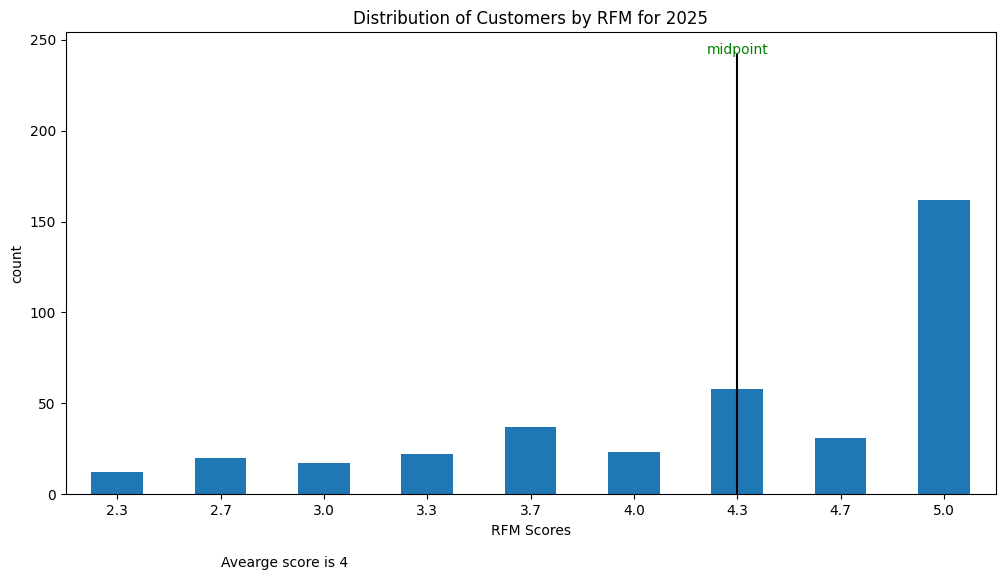

In [35]:
rfm_score2025 = rfm[rfm['rfm_year']==2025]

rfm_score2025['rfm_score'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.vlines(x=6,ymin=0,ymax=rfm['rfm_score'].value_counts().max(),linestyles='-',colors='black')
plt.text(x=6, y=rfm['rfm_score'].value_counts().max(),s='midpoint', color='green', ha='center')

mean_score = rfm_score2025['rfm_score'].mean()

plt.title('Distribution of Customers by RFM for 2025')
plt.ylabel('count')
plt.xlabel('RFM Scores')
plt.xticks(rotation=0)

plt.text(1,-40, f'Avearge score is {mean_score:.0f}')
plt.show()

### B2. Segementation

#### i. Normalise with Standar scaler

In [36]:
rfm = rfm[rfm['customer_id']!='nan']

In [37]:
new_rfm = rfm.drop('customer_id',axis=1)
new_rfm['year'] = new_rfm['order_date'].dt.year
new_rfm['month'] = new_rfm['order_date'].dt.month
new_rfm['month_name'] = new_rfm['order_date'].dt.month_name


In [38]:
new_rfm = rfm.drop(['order_date','customer_id','frequency_bin','recency_bin'],axis=1)


In [40]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
standardised_rfm = pd.DataFrame(scale.fit_transform(X=new_rfm),columns=new_rfm.columns)

#### ii. Use k-means to segment

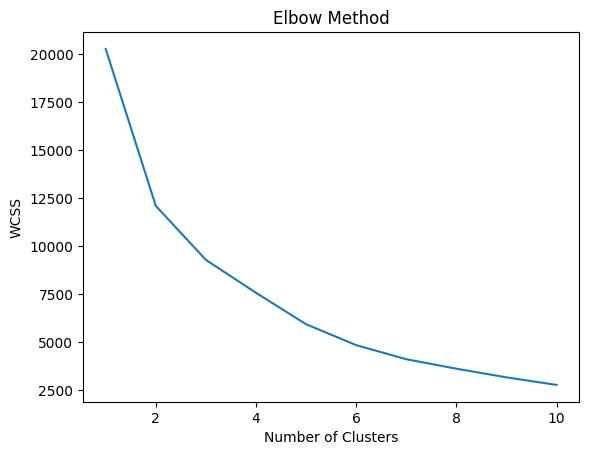

In [41]:
from sklearn.cluster import KMeans

wcss = [] # within-cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=5,random_state=100)
    kmeans = kmeans.fit(standardised_rfm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number is 2 because it is the point before the curve starts to flatten. That means, adding an extra cluster marginally reduces the WCSS and very little diminishing returns

In [42]:
k = 2

kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=100,n_init=5,random_state=100)
new_rfm['cluster'] = kmeans.fit_predict(standardised_rfm)
new_rfm


,recency (days),rfm_year,frequency,total_amount,recency_score,frequency_score,monetary_score,rfm_score,cluster
0,657,2023,1,6000.0,1,1,2,1.3,0
1,128,2024,2,4746.0,3,2,2,2.3,0
2,643,2023,1,1700.0,1,1,1,1.0,0
3,33,2025,18,44733.0,5,5,5,5.0,1
4,90,2024,3,12140.0,4,3,3,3.3,1
...,...,...,...,...,...,...,...,...,...
2527,351,2024,1,2649.0,2,2,1,1.7,0
2528,23,2025,39,66815.0,5,5,5,5.0,1
2529,27,2025,8,47378.0,5,4,5,4.7,1
2530,60,2024,15,50771.0,5,5,5,5.0,1


In [43]:
# adding cluster column to rfm dataframe
rfm = pd.merge(rfm,new_rfm['cluster'],how='left',left_index=True,right_index=True)

In [44]:
#adding cluster to main df - transaction report
# NOTE: THIS INNER JOIN MEANS Cutsomer_id == 'nan' is removed because its not found in rfm table
transaction_report = pd.merge(transaction_report,rfm[['customer_id','cluster']],on='customer_id',how='inner')


#### Defining Churn

* Churn in this case will be customers that havent purchased an item as long as 90 days. (Recency (days) more than 90)

In [45]:
# Added a churn column - true if recency > 90
rfm['churn'] = rfm['recency (days)'].map(lambda x: False if x < 90 else True)

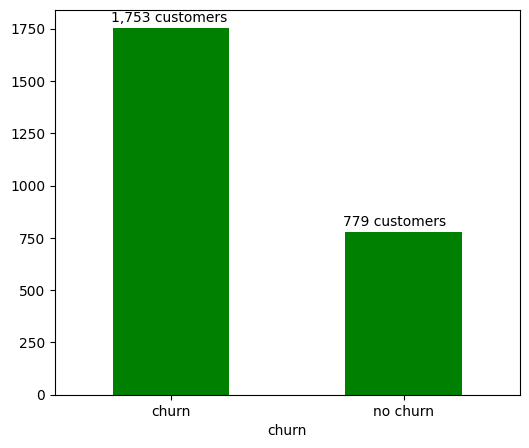

In [46]:
churn_distribution = rfm['churn'].value_counts()
plot = churn_distribution.plot(kind='bar',color='green',figsize=(6,5))
plot.set_xticklabels(['churn','no churn'])

for i,value in enumerate(churn_distribution.values):
    plt.text(i-0.26,value+30,s=f'{value:,} customers')

plt.xticks(rotation=0)
plt.show()

Checking churn distribution based on each delivery method

In [47]:
#creating df to check most frequent delivery method for each customer
most_frq_delivery = transaction_report.groupby('customer_id')['delivery_method'].agg(lambda x: x.mode()[0]).reset_index()

# joing most_frq_delivery df with rfm
rfm = pd.merge(left=rfm,right=most_frq_delivery,on='customer_id',how='left')

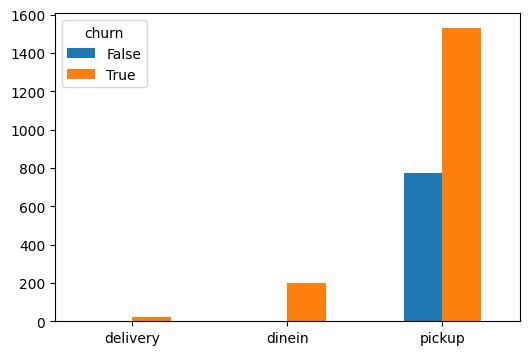

In [48]:
delivery_churn = rfm.groupby(['delivery_method','churn'])['delivery_method'].count().unstack().reset_index()
# delivery_churn

ax = delivery_churn.plot(kind='bar',figsize=(6,4)).set_xticklabels(['delivery','dinein','pickup'],rotation=0)


plt.show()

Year of Year Change in Churn

In [49]:
rfm['rfm_year'] = rfm['order_date'].dt.year

In [50]:
yoy_churn = pd.DataFrame(rfm.groupby('rfm_year')['churn'].sum().reset_index())
yoy_churn['percent_change'] = round((yoy_churn['churn'].pct_change()*100),2)
yoy_churn

,rfm_year,churn,percent_change
0,2023,599,NaN
1,2024,1154,92.65
2,2025,0,-100.00


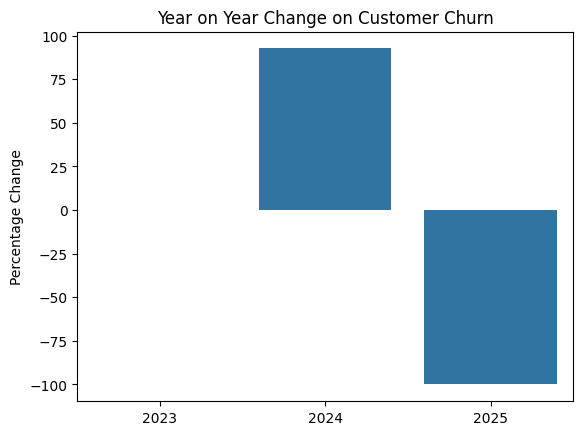

In [51]:
sns.barplot(data=yoy_churn,x='rfm_year',y='percent_change')


plt.title('Year on Year Change on Customer Churn')
plt.ylabel('Percentage Change')
plt.xlabel('')
plt.show()

In [52]:
rfm['rfm_month'] = rfm['order_date'].dt.month
rfm['rfm_month_name'] = rfm['order_date'].dt.month_name()


Month on Month Churn change

In [53]:
mom_churn = pd.DataFrame(rfm.groupby(['rfm_year','rfm_month','rfm_month_name'])['churn'].count().reset_index())
mom_churn['mom_percent_change'] = mom_churn['churn'].pct_change()*100


Month on Month Percentage Change in churn for 2023

C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\447949081.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mom_churn2023.plot(kind='line',marker='o',figsize=(8,7)).set_xticklabels(labels=mom_churn2023['rfm_month_name'])


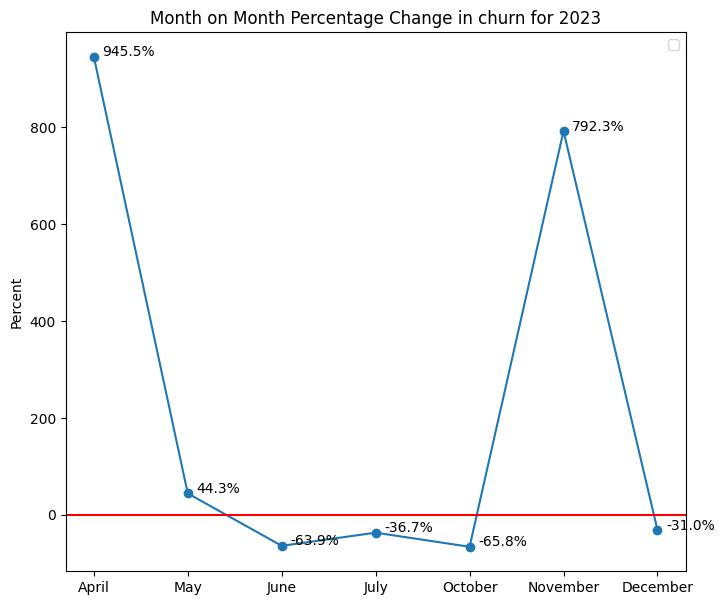

In [54]:
mom_churn2023 = mom_churn[mom_churn['rfm_year']==2023][['rfm_month_name','mom_percent_change']]
mom_churn2023.plot(kind='line',marker='o',figsize=(8,7)).set_xticklabels(labels=mom_churn2023['rfm_month_name'])


# to label each value on the visual
for i,value in enumerate(mom_churn2023['mom_percent_change'] ):
    plt.text(i+0.09,value+1,s=f'{round(value,1)}%')

plt.axhline(y=0,color='red')


plt.title('Month on Month Percentage Change in churn for 2023')
plt.ylabel('Percent')
plt.xlabel('')
plt.legend('')
plt.show()

Month on Month Percentage Change in churn for 2024

C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\4258546288.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mom_churn2024.plot(kind='line',marker='o',figsize=(8,7)).set_xticklabels(labels=mom_churn2024['rfm_month_name'])


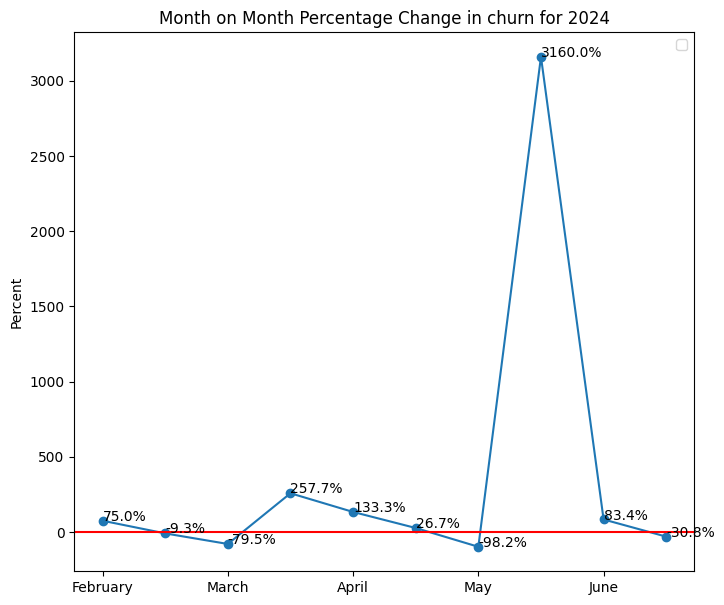

In [55]:
mom_churn2024 = mom_churn[mom_churn['rfm_year']==2024][['rfm_month_name','mom_percent_change']]
mom_churn2024.plot(kind='line',marker='o',figsize=(8,7)).set_xticklabels(labels=mom_churn2024['rfm_month_name'])


# to label each value on the visual
for i,value in enumerate(mom_churn2024['mom_percent_change'] ):
    plt.text(i+8,value,s=f'{round(value,1)}%')

plt.axhline(y=0,color='red')


plt.title('Month on Month Percentage Change in churn for 2024')
plt.ylabel('Percent')
plt.xlabel('')
plt.legend('')
plt.show()

Dont have enough data for 2025

In [56]:
len(transaction_report)

18163

In [57]:
orders_report.head(2)

,store_name,store_location,increment_id,status,state,delivery_method,product_name,store_currency_code,price,qty,row_total,bas_cad,payment_method,created_at,updated_at,order_item_integrator_option,order_year,order_month,order_month_name
0,AB GRILLS,None,R26998024,delivery_confirmed_by_vendor,complete,pickup,Indomie Noodles (Small),NGN,599.0,2.0,1198.0,1.12,prepaid_pos,2025-01-22 16:04:00+00:00,2025-01-22 15:04:00+00:00,None,2025,1,January
1,AB GRILLS,None,R26998024,delivery_confirmed_by_vendor,complete,pickup,Fried Egg,NGN,449.0,1.0,449.0,0.42,prepaid_pos,2025-01-22 16:04:00+00:00,2025-01-22 15:04:00+00:00,None,2025,1,January


### Merged both Tables

In [58]:
result = pd.merge(
    left=transaction_report,
    right=orders_report,
    on='increment_id',
    how='inner'
)


# cleaning
result.drop('delivery_method_x',axis=1,inplace=True)
result.drop('payment_method_y',axis=1,inplace=True)
result.drop('order_item_integrator_option',axis=1,inplace=True)
result.drop('store_currency_code',axis=1,inplace=True)
result.drop(['created_at','updated_at'],axis=1,inplace=True)
result.drop('delivery_method_y',axis=1,inplace=True)
result.drop('payment_method_x',axis=1,inplace=True)
result.drop('store_location',axis=1,inplace=True)
result.drop(['transaction_year','transaction_month','transaction_month_name'],axis=1,inplace=True)
result.drop('store_name',axis=1,inplace=True)
result.drop('source',axis=1,inplace=True)
result.drop('status',axis=1,inplace=True)
result.drop('order_status',axis=1,inplace=True)
result.rename(columns={'amount_paid':'total_amount_paid_for_order'},inplace=True)

In [59]:
# to merge recency and frequency to result - result df already has monetary(total_amount_paid_for_order)
to_merge_rfm_to_result = rfm[['customer_id','recency (days)','frequency']]

result = pd.merge(left=result,right=to_merge_rfm_to_result,on='customer_id',how='inner')

In [60]:
model_dataset = pd.DataFrame(result.groupby(['customer_id','increment_id'])['total_amount_paid_for_order'].max()).reset_index()
model_dataset = pd.DataFrame(model_dataset.groupby('customer_id')['total_amount_paid_for_order'].sum()).reset_index()

max_cluster = result.groupby('customer_id')['cluster'].max()
model_dataset = model_dataset.merge(max_cluster, on='customer_id', suffixes=('', '_max'))

max_qty = pd.DataFrame(result.groupby(['customer_id','increment_id'])['qty'].sum()).reset_index()
max_qty = pd.DataFrame(max_qty.groupby('customer_id')['qty'].sum()).reset_index()
model_dataset = pd.merge(model_dataset,max_qty,on='customer_id')

max_recency = pd.DataFrame(result.groupby('customer_id')['recency (days)'].max()).reset_index()
model_dataset = pd.merge(model_dataset,max_recency,on='customer_id')

max_frequency = pd.DataFrame(result.groupby('customer_id')['frequency'].max()).reset_index()
model_dataset = pd.merge(model_dataset,max_frequency,on='customer_id')


max_churn = rfm.groupby('customer_id',as_index=False)['churn'].max()
mapper = {True:1,False:0}
max_churn['churn'] = max_churn['churn'].map(mapper)
model_dataset = pd.merge(model_dataset,max_churn,on='customer_id')

model_dataset.drop('customer_id',axis=1,inplace=True)

model_dataset

,total_amount_paid_for_order,cluster,qty,recency (days),frequency,churn
0,6000.0,0,2.0,657,1,1
1,4746.0,0,4.0,128,2,1
2,1700.0,0,1.0,643,1,1
3,44733.0,1,107.0,33,18,0
4,12140.0,1,19.0,90,3,1
...,...,...,...,...,...,...
2527,2649.0,0,1.0,351,1,1
2528,66815.0,1,87.0,23,39,0
2529,47378.0,1,78.0,27,8,0
2530,50771.0,1,73.0,60,15,0


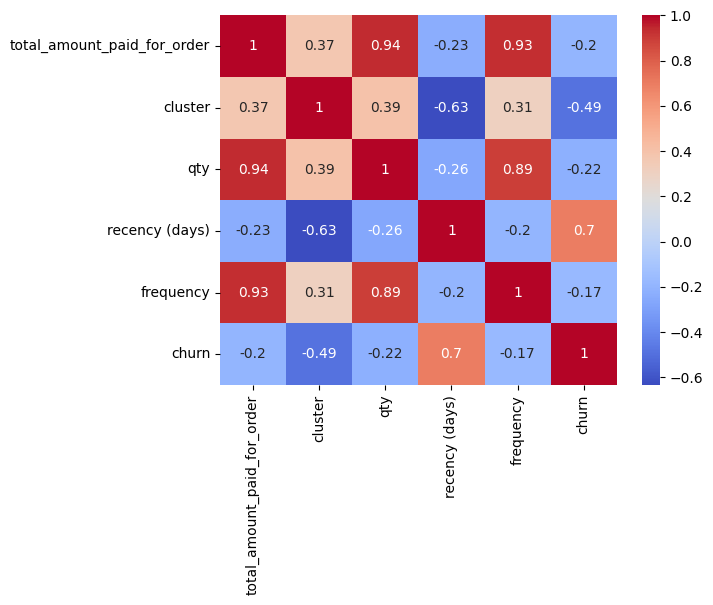

In [61]:
model_corr = model_dataset.corr()
sns.heatmap(model_corr,cmap='coolwarm',annot=True)
plt.show()

### Churn Prediction for Transaction Orders

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

#### Modelling

In [63]:
target = model_dataset['churn']
features = model_dataset.drop('churn',axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=233)

rc = RandomForestClassifier(n_estimators=50,oob_score=True)
rc.fit(X_train,y_train)

train_prediction = rc.predict(X_train)
test_prediction = rc.predict(X_test)


In [64]:
from sklearn.metrics import *
print(accuracy_score(train_prediction,y_train))
print(confusion_matrix(train_prediction,y_train))
print('------------------------------')
print(accuracy_score(test_prediction,y_test))
print(confusion_matrix(test_prediction,y_test))



1.0
[[ 545    0]
 [   0 1227]]
------------------------------
1.0
[[234   0]
 [  0 526]]


In [65]:
pd.Series(index=rc.feature_names_in_,data=rc.feature_importances_).sort_values(ascending=False).reset_index().rename(columns={0:'value'})

,index,value
0,recency (days),0.832658
1,cluster,0.100202
2,qty,0.033202
3,total_amount_paid_for_order,0.025146
4,frequency,0.008793


## Time Series Sales Prediction

In [66]:
result.head()

,id,customer_firstname,customer_lastname,customer_telephone,order_state,increment_id,order_date,clerk_id,delivery_address,total_amount_paid_for_order,...,product_name,price,qty,row_total,bas_cad,order_year,order_month,order_month_name,recency (days),frequency
0,16998024,Fregene,Emmanuel,2.348064e+12,complete,R26998024,2025-01-22 16:04:41,267702.0,"Benson Idahosa University Legacy Campus,,NG",2695.0,...,Indomie Noodles (Small),599.0,2.0,1198.0,1.12,2025,1,January,18,13
1,16998024,Fregene,Emmanuel,2.348064e+12,complete,R26998024,2025-01-22 16:04:41,267702.0,"Benson Idahosa University Legacy Campus,,NG",2695.0,...,Fried Egg,449.0,1.0,449.0,0.42,2025,1,January,18,13
2,16998024,Fregene,Emmanuel,2.348064e+12,complete,R26998024,2025-01-22 16:04:41,267702.0,"Benson Idahosa University Legacy Campus,,NG",2695.0,...,Sausage,399.0,2.0,798.0,0.75,2025,1,January,18,13
3,16998024,Fregene,Emmanuel,2.348064e+12,complete,R26998024,2025-01-22 16:04:41,267702.0,"Benson Idahosa University Legacy Campus,,NG",2695.0,...,Big pack + Nylon + Cutlery,250.0,1.0,250.0,0.23,2025,1,January,18,13
4,16997980,maro,",,",2.349061e+12,complete,R26997980,2025-01-22 16:03:00,267702.0,"Benson Idahosa University Legacy Campus,,NG",3095.0,...,Pasta only,799.0,2.0,1598.0,1.49,2025,1,January,18,16


In [67]:
result.iloc[:,4:]

,order_state,increment_id,order_date,clerk_id,delivery_address,total_amount_paid_for_order,customer_id,cluster,state,product_name,price,qty,row_total,bas_cad,order_year,order_month,order_month_name,recency (days),frequency
0,complete,R26998024,2025-01-22 16:04:41,267702.0,"Benson Idahosa University Legacy Campus,,NG",2695.0,0922b6e0-1ab6-5592-8315-3373f65c8f8f,1,complete,Indomie Noodles (Small),599.0,2.0,1198.0,1.12,2025,1,January,18,13
1,complete,R26998024,2025-01-22 16:04:41,267702.0,"Benson Idahosa University Legacy Campus,,NG",2695.0,0922b6e0-1ab6-5592-8315-3373f65c8f8f,1,complete,Fried Egg,449.0,1.0,449.0,0.42,2025,1,January,18,13
2,complete,R26998024,2025-01-22 16:04:41,267702.0,"Benson Idahosa University Legacy Campus,,NG",2695.0,0922b6e0-1ab6-5592-8315-3373f65c8f8f,1,complete,Sausage,399.0,2.0,798.0,0.75,2025,1,January,18,13
3,complete,R26998024,2025-01-22 16:04:41,267702.0,"Benson Idahosa University Legacy Campus,,NG",2695.0,0922b6e0-1ab6-5592-8315-3373f65c8f8f,1,complete,Big pack + Nylon + Cutlery,250.0,1.0,250.0,0.23,2025,1,January,18,13
4,complete,R26997980,2025-01-22 16:03:00,267702.0,"Benson Idahosa University Legacy Campus,,NG",3095.0,a4ee0a15-9444-5e41-94d2-083a0ac532f1,1,complete,Pasta only,799.0,2.0,1598.0,1.49,2025,1,January,18,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55991,complete,R11939143,2023-01-22 16:19:31,252049.0,"Dummy street,,NG",4700.0,74a0461f-f8af-5d9f-b5e1-1e1a784e2a54,1,complete,Sharwama,0.0,1.0,0.0,0.00,2023,1,January,32,663
55992,complete,R11939143,2023-01-22 16:19:31,252049.0,"Dummy street,,NG",4700.0,74a0461f-f8af-5d9f-b5e1-1e1a784e2a54,1,complete,Milkshake,1500.0,1.0,1500.0,1.40,2023,1,January,32,663
55993,complete,R11939143,2023-01-22 16:19:31,252049.0,"Dummy street,,NG",4700.0,74a0461f-f8af-5d9f-b5e1-1e1a784e2a54,1,complete,Chapman,1500.0,1.0,1500.0,1.40,2023,1,January,32,663
55994,complete,R11939143,2023-01-22 16:19:31,252049.0,"Dummy street,,NG",4700.0,74a0461f-f8af-5d9f-b5e1-1e1a784e2a54,1,complete,"Turkey, Sweet Potatoes & Sauce",1500.0,1.0,1500.0,1.40,2023,1,January,32,663


In [68]:
date_only = result['order_date'].dt.date

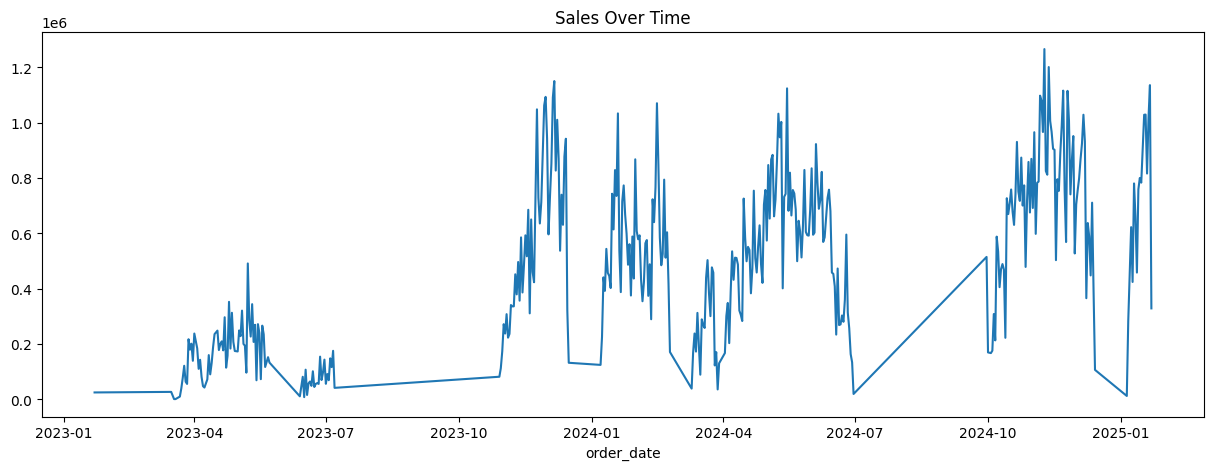

In [69]:
sales_over_time = result.groupby(date_only)['total_amount_paid_for_order'].sum()

sales_over_time.plot(style='-',figsize=(15,5),title='Sales Over Time')

plt.show()

### Feature Engineering

In [70]:
xgb_data = pd.DataFrame(result['order_date'])
xgb_data.rename(columns={'order_date':'order_date_time'},inplace=True)


#### new from this morning

In [71]:
date = result['order_date'].dt.date

xgb_data = pd.DataFrame(result.groupby(date)['row_total'].sum())
xgb_data.rename(columns={'row_total':'total_sales'},inplace=True)


# average qty per day
avg_order = result.groupby(date)['qty'].mean().rename('average_qty')
xgb_data = pd.merge(xgb_data,right=avg_order,on='order_date')

# total qty per day
total_order = result.groupby(date)['qty'].sum().rename('total_qty')
xgb_data = pd.merge(xgb_data,right=total_order,on='order_date')

# average frequency per day
avg_freq = result.groupby(date)['frequency'].mean().rename('average_freq')
xgb_data = pd.merge(xgb_data,right=avg_freq,on='order_date')

# total frequency per day
total_freq = result.groupby(date)['frequency'].sum().rename('total_freq')
xgb_data = pd.merge(xgb_data,right=total_freq,on='order_date')


# average recency per day
avg_rec = result.groupby(date)['recency (days)'].mean().rename('average_recency')
xgb_data = pd.merge(xgb_data,right=avg_rec,on='order_date')

# total recency per day
total_rec = result.groupby(date)['recency (days)'].sum().rename('total_recency')
xgb_data = pd.merge(xgb_data,right=total_rec,on='order_date')



xgb_data.reset_index(inplace=True)

xgb_data['order_date'] = pd.to_datetime(xgb_data['order_date'])


xgb_data['year'] = xgb_data['order_date'].dt.year
xgb_data['month'] = xgb_data['order_date'].dt.month
xgb_data['weekday'] = xgb_data['order_date'].dt.weekday
xgb_data['day'] = xgb_data['order_date'].dt.day
xgb_data['hour'] = xgb_data['order_date'].dt.hour

xgb_data


,order_date,total_sales,average_qty,total_qty,average_freq,total_freq,average_recency,total_recency,year,month,weekday,day,hour
0,2023-01-22,6200.0,1.000000,6.0,555.500000,3333,98.333333,590,2023,1,6,22,0
1,2023-03-16,12000.0,1.333333,8.0,448.000000,2688,164.666667,988,2023,3,3,16,0
2,2023-03-18,600.0,1.000000,3.0,6.666667,20,606.000000,1818,2023,3,5,18,0
3,2023-03-19,600.0,1.000000,3.0,14.333333,43,499.666667,1499,2023,3,6,19,0
4,2023-03-22,6000.0,1.000000,3.0,442.333333,1327,251.333333,754,2023,3,2,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2025-01-18,297731.0,1.411765,360.0,19.501961,4973,20.964706,5346,2025,1,5,18,0
384,2025-01-19,216577.0,1.390558,324.0,16.167382,3767,20.553648,4789,2025,1,6,19,0
385,2025-01-20,274563.0,1.325503,395.0,24.738255,7372,19.842282,5913,2025,1,0,20,0
386,2025-01-21,301133.0,1.231013,389.0,24.104430,7617,19.158228,6054,2025,1,1,21,0


#### new end

In [72]:
xgb_data = pd.DataFrame(result.groupby('order_date')['row_total'].sum())
xgb_data.rename(columns={'row_total':'total_sales'},inplace=True)


# average qty per day
avg_order = result.groupby('order_date')['qty'].mean().rename('average_qty')
xgb_data = pd.merge(xgb_data,right=avg_order,on='order_date')

# total qty per day
total_order = result.groupby('order_date')['qty'].sum().rename('total_qty')
xgb_data = pd.merge(xgb_data,right=total_order,on='order_date')

# average frequency per day
avg_freq = result.groupby('order_date')['frequency'].mean().rename('average_freq')
xgb_data = pd.merge(xgb_data,right=avg_freq,on='order_date')

# total frequency per day
total_freq = result.groupby('order_date')['frequency'].sum().rename('total_freq')
xgb_data = pd.merge(xgb_data,right=total_freq,on='order_date')


# average recency per day
avg_rec = result.groupby('order_date')['recency (days)'].mean().rename('average_recency')
xgb_data = pd.merge(xgb_data,right=avg_rec,on='order_date')

# total recency per day
total_rec = result.groupby('order_date')['recency (days)'].sum().rename('total_recency')
xgb_data = pd.merge(xgb_data,right=total_rec,on='order_date')



xgb_data.reset_index(inplace=True)

xgb_data['year'] = xgb_data['order_date'].dt.year
xgb_data['month'] = xgb_data['order_date'].dt.month
xgb_data['weekday'] = xgb_data['order_date'].dt.weekday
xgb_data['day'] = xgb_data['order_date'].dt.day
xgb_data['hour'] = xgb_data['order_date'].dt.hour




xgb_data.sample(2)

,order_date,total_sales,average_qty,total_qty,average_freq,total_freq,average_recency,total_recency,year,month,weekday,day,hour
13026,2024-10-06 13:20:00,1995.0,1.25,5.0,11.0,44,69.0,276,2024,10,6,6,13
14179,2024-10-27 20:32:59,2494.0,1.50,6.0,13.0,52,105.0,420,2024,10,6,27,20


### Train / Test / Split

In [73]:
train_data = xgb_data[xgb_data['order_date']<'2024-08-01']
# train_data = train_data.drop('order_date',axis=1,inplace=True)
test_data = xgb_data[xgb_data['order_date']>'2024-08-01']
# test_data = test_data.drop('order_date',axis=1,inplace=True)


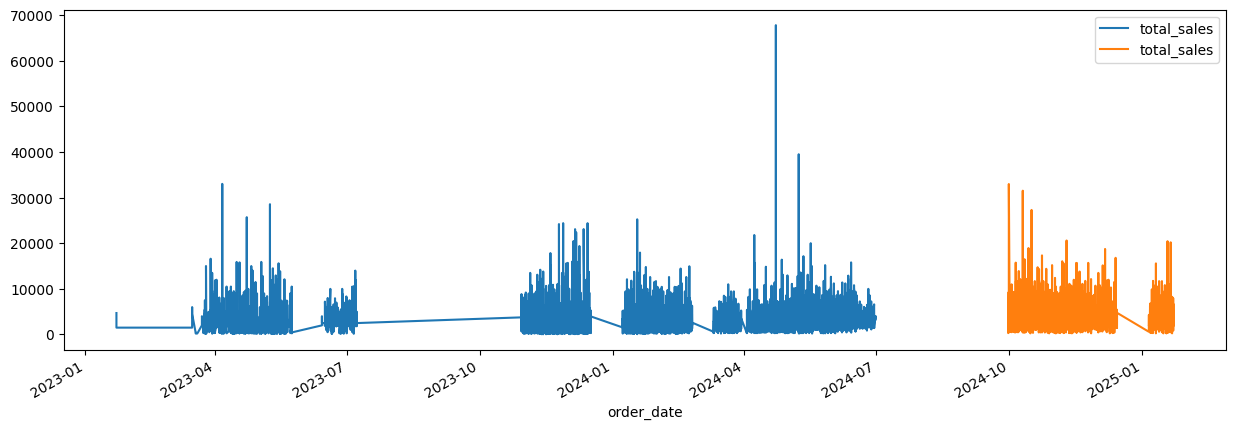

In [74]:
train_sales = train_data[['order_date','total_sales']]
test_sales = test_data[['order_date','total_sales']]


fig, ax = plt.subplots(figsize=(15,5))

train_sales.plot(x='order_date',ax=ax,kind='line')
test_sales.plot(x='order_date',ax=ax,kind='line')

plt.show()


In [75]:
train_data.columns

Index(['order_date', 'total_sales', 'average_qty', 'total_qty', 'average_freq',
       'total_freq', 'average_recency', 'total_recency', 'year', 'month',
       'weekday', 'day', 'hour'],
      dtype='object')

In [76]:
feat = ['average_qty', 'total_qty', 'average_freq',
       'total_freq', 'average_recency', 'total_recency', 'year', 'month',
       'weekday', 'day', 'hour']
target = ['total_sales']

X_train = train_data[feat]
y_train = train_data[target]

X_test = test_data[feat]
y_test = test_data[target]

In [77]:
xgb_data.sample(3)

,order_date,total_sales,average_qty,total_qty,average_freq,total_freq,average_recency,total_recency,year,month,weekday,day,hour
9981,2024-05-04 20:15:57,6997.0,1.25,5.0,20.0,80,23.0,92,2024,5,5,4,20
11644,2024-05-31 20:34:22,1799.0,1.00,5.0,29.0,145,254.0,1270,2024,5,4,31,20
17629,2025-01-14 19:55:43,2445.0,1.00,5.0,21.0,105,19.0,95,2025,1,1,14,19


In [80]:
import xgboost as xgb

regressor = xgb.XGBRegressor(n_estimators=100,early_stopping_rounds=50)

regressor.fit(X_train,y_train,
              eval_set=[(X_train,y_train),(X_test,y_test)],
              verbose=True)

[0]	validation_0-rmse:2020.65140	validation_1-rmse:2153.58723
[1]	validation_0-rmse:1886.08561	validation_1-rmse:2095.54994
[2]	validation_0-rmse:1803.71691	validation_1-rmse:2063.43716
[3]	validation_0-rmse:1750.30209	validation_1-rmse:2040.85512
[4]	validation_0-rmse:1705.09916	validation_1-rmse:2033.31564
[5]	validation_0-rmse:1674.72828	validation_1-rmse:2030.73187
[6]	validation_0-rmse:1652.88047	validation_1-rmse:2027.23403
[7]	validation_0-rmse:1636.08115	validation_1-rmse:2021.89049
[8]	validation_0-rmse:1614.50416	validation_1-rmse:2027.64189
[9]	validation_0-rmse:1603.25187	validation_1-rmse:2033.30640
[10]	validation_0-rmse:1589.54370	validation_1-rmse:2031.46349
[11]	validation_0-rmse:1580.06940	validation_1-rmse:2028.89085
[12]	validation_0-rmse:1569.63085	validation_1-rmse:2027.57039
[13]	validation_0-rmse:1556.69569	validation_1-rmse:2024.48841
[14]	validation_0-rmse:1549.72140	validation_1-rmse:2023.70845
[15]	validation_0-rmse:1544.11076	validation_1-rmse:2022.76977
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
importance = pd.DataFrame(data=regressor.feature_importances_,index=regressor.feature_names_in_)
importance.sort_values(by=0,ascending=False,inplace=True)
importance.rename(columns={0:'importance'},inplace=True)
importance

,importance
total_qty,0.377805
average_qty,0.103047
year,0.085766
average_freq,0.069611
hour,0.068446
month,0.063236
average_recency,0.058315
total_freq,0.052445
total_recency,0.048127
day,0.038794


## Evaluation

In [85]:
test_data['prediction'] = regressor.predict(X_test)
test_data['error'] = np.absolute(test_data['total_sales'] - test_data['prediction'])

test_data.sample(6)

C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\3019313340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = regressor.predict(X_test)
C:\Users\chukw\AppData\Local\Temp\ipykernel_10260\3019313340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['error'] = np.absolute(test_data['total_sales'] - test_data['prediction'])


,order_date,total_sales,average_qty,total_qty,average_freq,total_freq,average_recency,total_recency,year,month,weekday,day,hour,prediction,error
13544,2024-10-17 12:46:44,1846.0,1.25,5.0,160.0,640,19.0,76,2024,10,3,17,12,3219.253662,1373.253662
14196,2024-10-28 14:59:45,1097.0,1.00,3.0,142.0,426,23.0,69,2024,10,0,28,14,2721.175781,1624.175781
16373,2024-11-28 11:15:40,2496.0,1.00,6.0,12.0,72,31.0,186,2024,11,3,28,11,2883.064697,387.064697
13655,2024-10-18 21:49:35,3899.0,1.00,1.0,1.0,1,114.0,114,2024,10,4,18,21,3060.592041,838.407959
17884,2025-01-18 20:23:12,2096.0,1.00,4.0,5.0,20,20.0,80,2025,1,5,18,20,3542.440186,1446.440186
16302,2024-11-26 20:36:23,2895.0,1.20,6.0,8.0,40,61.0,305,2024,11,1,26,20,2508.732910,386.267090


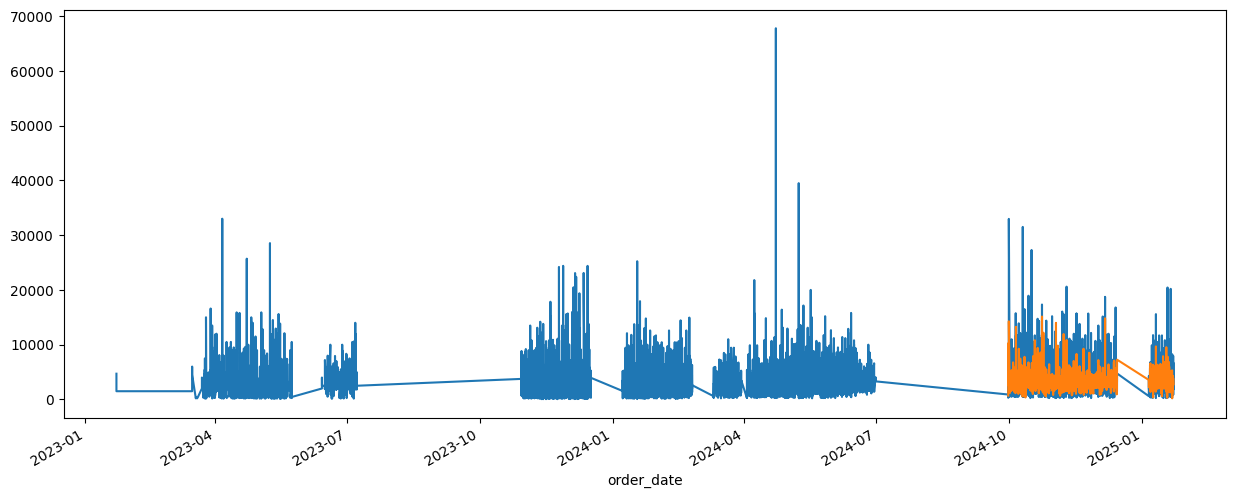

In [86]:
fig, ax = plt.subplots(figsize=(15,6))

xgb_data.groupby('order_date')['total_sales'].sum().plot(ax=ax, kind='line')
test_data.groupby('order_date')['prediction'].sum().plot(ax=ax, kind='line')

plt.show()

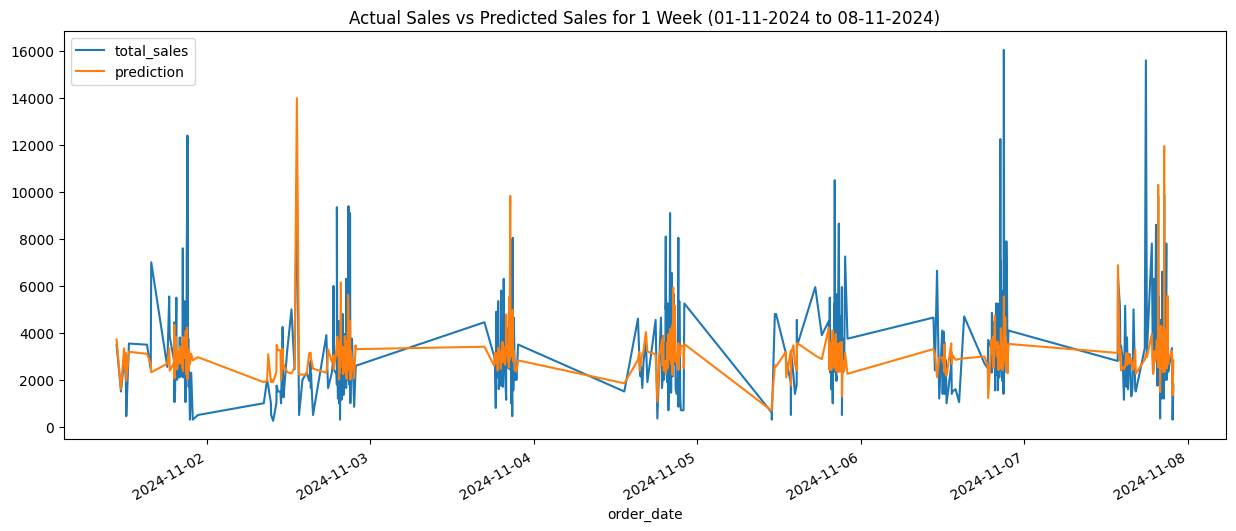

In [87]:
actual_check = test_data[(test_data['order_date']>'2024-11-01') & (test_data['order_date']<'2024-11-08')][['order_date','total_sales']]
pred_check = test_data[(test_data['order_date']>'2024-11-01') & (test_data['order_date']<'2024-11-08')][['order_date','prediction']]


fig,ax = plt.subplots(figsize=(15,6))
actual_check.plot(x='order_date', ax=ax,style='-')
pred_check.plot(x='order_date', ax=ax,style='-')

plt.title('Actual Sales vs Predicted Sales for 1 Week (01-11-2024 to 08-11-2024)')
plt.show()